In [21]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
#parse data 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#label encoding on categorical data 

df = pd.read_csv('ee6d2f60cdafb550.csv')
df = df.dropna()
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.FFI49_desc)
print(len(integer_encoded))
print(len(df.FFI49_desc))
df.FFI49_desc = integer_encoded
df.divyield_Median = [float(x.strip('%'))/100 for x in df.divyield_Median]

print(len(np.where(df.indret_vw > 0)[0]))
print(len(np.where(df.indret_vw < 0)[0]))

9297
9297
5410
3886


In [22]:
output = df.indret_vw
outputtwo = df.indret_ew
data = df.drop(columns = ['indret_ew','indret_vw','staff_sale_Median'])
data = data.iloc[:,3:]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, output, test_size=0.20)

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
reg.coef_

y_pred = reg.predict(x_test)
print('mse: {}'.format(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

#Binary classification-Logistic Regression
transformed_output = [1 if o >= 0 else -1 for o in output]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, transformed_output, test_size=0.20)

clf = LogisticRegression(random_state=229, solver='liblinear').fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

unique, counts = np.unique(y_pred, return_counts=True)
print('{}\t{}'.format(unique, counts))

mse: 1.0116136332759775
r2: -0.028452476517936587
mse: 1.5505376344086022
r2: -0.5990584935897432
0.6123655913978494
[-1  1]	[ 275 1585]


In [24]:
from sklearn.feature_selection import f_regression

f_score, pvals = f_regression(x_train, y_train)
print(len(pvals))

# print(f_score)
# print(f_score)
# print(pvals)
print(pvals[pvals < 0.05])
print(data.columns.values[pvals < 0.05])

ftest_data = data[data.columns.values[(pvals < 0.05)]]

70
[5.64942249e-03 1.74122500e-02 2.86883937e-06 2.13799981e-03
 2.27093860e-05 1.12558040e-04 3.79013755e-07 2.75974588e-10
 1.94471490e-02 8.31776138e-03 4.56087094e-02 2.97819002e-02
 4.19216164e-02 9.34962829e-03 2.58606264e-02 2.26140756e-03
 1.41616714e-02 1.34832595e-03 3.99279253e-03 6.47800694e-03
 1.43580810e-03 1.34416543e-09]
['divyield_Median' 'evm_Median' 'pcf_Median' 'pe_exi_Median'
 'pe_op_basic_Median' 'pe_op_dil_Median' 'ps_Median' 'ptb_Median'
 'aftret_eq_Median' 'aftret_equity_Median' 'aftret_invcapx_Median'
 'npm_Median' 'pretret_earnat_Median' 'pretret_noa_Median' 'roce_Median'
 'roe_Median' 'rect_act_Median' 'fcf_ocf_Median' 'int_debt_Median'
 'int_totdebt_Median' 'PEG_1yrforward_Median' 'PEG_ltgforward_Median']


In [31]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(ftest_data, output, test_size=0.20)

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
reg.coef_

y_pred = reg.predict(x_test)
print('mse: {}'.format(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

mse: 0.004589386037878954
r2: 0.04226377749332966


In [32]:
#Binary classification-Logistic Regression
transformed_output = [1 if o >= 0 else -1 for o in output]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(ftest_data, transformed_output, test_size=0.20)

clf = LogisticRegression(random_state=229, solver='liblinear').fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

unique, counts = np.unique(y_pred, return_counts=True)
print('{}\t{}'.format(unique, counts))

mse: 1.5870967741935484
r2: -0.6260821356987507
0.603225806451613
[-1  1]	[ 154 1706]


In [33]:
reverse_ftest_data = data[data.columns.values[~(pvals < 0.05)]]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(reverse_ftest_data, 
                                                                            transformed_output, test_size=0.20)

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
reg.coef_

y_pred = reg.predict(x_test)
print('mse: {}'.format(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

#Binary classification-Logistic Regression
transformed_output = [1 if o >= 0 else -1 for o in output]

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(reverse_ftest_data, transformed_output, test_size=0.20)

clf = LogisticRegression(random_state=229, solver='liblinear').fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

unique, counts = np.unique(y_pred, return_counts=True)
print('{}\t{}'.format(unique, counts))

mse: 0.97867564384463
r2: -0.0034051906641430207
mse: 1.6150537634408602
r2: -0.6793704074173812
0.5962365591397849
[-1  1]	[  31 1829]


number of increasing: 1690


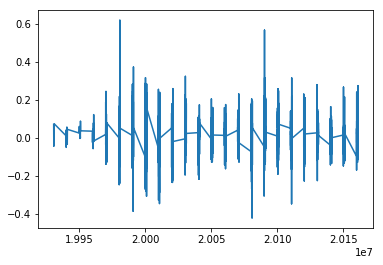

number of decreasing: 170
Average precision-recall score: 0.59


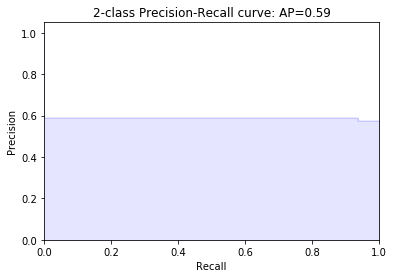

In [14]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

print('number of increasing: {}'.format(len(np.where(y_pred > 0)[0])))

plt.plot(df.public_date, output)

plt.show()

print('number of decreasing: {}'.format(len(np.where(y_pred < 0)[0])))
      
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.1,
         where='post')
plt.fill_between(recall, precision, alpha=0.1, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [15]:
dfsp = pd.read_csv('eafe6a287f1adb2b.csv')
outputsp = df.indret_ew
outputtwosp = df.indret_vw

In [16]:
df = pd.read_csv('ee6d2f60cdafb550.csv')
df.sort_values(by='public_date')

,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
0,19700131,AERO,8,-0.117325,-0.149955,0.000,1.356,0.696,8.490,4.76%,...,8.843,4.416,3.019,7.479,0.021,0.000,0.000,0.388,NaN,NaN
22,19700131,HSHLD,25,-0.070517,-0.068231,0.000,2.131,0.351,18.974,3.20%,...,7.856,2.443,2.057,3.981,0.002,0.000,0.000,0.000,NaN,NaN
23,19700131,LABEQ,1,-0.083478,-0.083478,0.000,8.505,0.191,44.643,NaN,...,5.992,1.585,1.580,2.582,-0.058,0.000,0.000,0.445,NaN,NaN
24,19700131,MACH,40,-0.038664,-0.071795,0.048,1.270,0.524,10.474,4.68%,...,5.539,2.145,1.697,3.062,0.003,0.000,0.000,0.000,NaN,NaN
25,19700131,MEALS,1,-0.326923,-0.326923,0.448,0.053,0.266,3.652,3.43%,...,13.913,2.512,1.757,7.331,0.028,0.000,0.000,0.000,NaN,NaN
26,19700131,MEDEQ,1,-0.007937,-0.007937,0.000,7.421,0.423,34.144,1.07%,...,4.370,2.041,1.355,1.788,0.044,0.000,0.000,0.000,NaN,NaN
27,19700131,MINES,7,-0.046483,-0.064723,0.000,0.348,0.463,12.518,5.73%,...,7.728,0.969,0.884,2.951,0.049,0.000,0.000,0.000,NaN,NaN
28,19700131,OIL,21,-0.122596,-0.128312,0.000,1.369,0.534,10.543,5.10%,...,5.704,1.080,0.824,5.185,0.059,0.000,0.000,0.115,NaN,NaN
30,19700131,RTAIL,27,-0.056199,-0.059770,0.000,2.129,0.673,13.637,3.57%,...,30.907,4.600,3.510,8.853,0.008,0.000,0.000,0.000,NaN,NaN
31,19700131,SHIPS,3,-0.050288,-0.056947,0.000,0.190,0.795,9.208,5.18%,...,5.147,3.072,2.410,4.715,-0.019,0.000,0.000,0.000,NaN,NaN


In [17]:
df.describe()

,public_date,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,evm_Median,pcf_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
count,2.518800e+04,25188.000000,25143.000000,25143.000000,25034.000000,23865.000000,25186.000000,25187.000000,25186.000000,25186.000000,...,25138.000000,25188.000000,25188.000000,24577.000000,25186.000000,25188.000000,25186.000000,25186.000000,21555.000000,18984.000000
mean,1.993518e+07,10.681753,0.011830,0.010508,0.292932,1.409593,0.635862,21.112411,8.885819,10.261947,...,9.498688,2.798205,1.629473,7.949518,0.035598,0.013711,0.013081,0.039355,0.666897,1.408018
std,1.346762e+05,9.359648,0.075221,0.073355,1.845015,2.816861,0.421867,103.482835,8.215927,11.249100,...,11.207948,13.426756,0.792297,458.055652,0.041333,0.030763,0.024436,0.094464,2.070773,1.854341
min,1.970013e+07,1.000000,-0.477184,-0.477206,-4.003000,-15.636000,0.001000,-1031.000000,-634.290000,-329.770000,...,0.082000,0.417000,0.232000,-40463.000000,-0.389000,0.000000,0.000000,0.000000,-50.389000,-30.091000
25%,1.982053e+07,3.000000,-0.028681,-0.028955,0.033000,0.470000,0.335000,12.354500,6.507000,6.056000,...,5.681000,1.783750,1.124000,4.228000,0.014000,0.000000,0.000000,0.000000,0.194000,1.016000
50%,1.994023e+07,8.000000,0.011136,0.010303,0.248000,0.867000,0.516000,18.219000,8.433000,9.228500,...,7.010000,2.358000,1.546000,6.693000,0.037000,0.000000,0.000000,0.000000,0.713000,1.365000
75%,2.005093e+07,15.000000,0.051200,0.049365,0.390000,1.479000,0.828000,25.026000,10.588750,13.142250,...,9.101000,3.071000,1.989000,11.896000,0.057000,0.010000,0.016000,0.000000,1.257000,1.755000
max,2.017013e+07,51.000000,1.320997,1.239549,163.957000,74.358000,3.768000,7522.850000,216.961000,349.224000,...,300.799000,1209.790000,7.614000,8210.620000,0.655000,0.202000,0.152000,0.477000,32.240000,42.843000
